# $\vert + \rangle$ state decaying
2020/11/17

ibmq_toronto

In [9]:
from pprint import pprint
from datetime import date
from experiments.utils import get_IBM_backend, pickle_load, pickle_dump
from experiments.waiting_duration import EvaluateDelay
from experiments.waiting_duration.benchmarks import prepare_pulsestateBench
from experiments.waiting_duration import execute_bench
backend_name = "ibmq_toronto"
nseed = 5
backend = get_IBM_backend(backend_name)
simulator = get_IBM_backend("ibmq_qasm_simulator")

## Send job

In [2]:
initial_layout = [0]

In [3]:
# max(dt) = 1E6
qc = prepare_pulsestateBench("e6") 
delay_duration_e6 = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000]
execute_bench(
            qc, 
            backend=backend, 
            simulator=simulator, 
            initial_layout=initial_layout, 
            delay_duration_list=delay_duration_e6,
            nseed=nseed, 
)

/Users/Yasuhiro/.local/share/virtualenvs/experiments-VWP9UmJy/lib/python3.8/site-packages/qiskit/compiler/assemble.py:304: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


In [4]:
# max(dt) = 1E5
qc = prepare_pulsestateBench("e5") 
delay_duration_e5 = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000]
execute_bench(
            qc, 
            backend=backend, 
            simulator=simulator, 
            initial_layout=initial_layout, 
            delay_duration_list=delay_duration_e5,
            nseed=nseed, 
)

In [5]:
# max(dt) = 1E4
qc = prepare_pulsestateBench("e4") 
delay_duration_e4 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
execute_bench(
            qc, 
            backend=backend, 
            simulator=simulator, 
            initial_layout=initial_layout, 
            delay_duration_list=delay_duration_e4,
            nseed=nseed, 
)

## calculate results

In [10]:
path_= "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/job_id/"+backend_name+"/"+str(date.today())+"_pulse state_e6_"+ backend_name +"_["
_path= "].pickle"
experiments_data_path = path_+ str(0) +_path

exp_data = pickle_load(experiments_data_path)
job_sim = simulator.retrieve_job(exp_data["simulator"]["job_id"])
job_delay_before = [backend.retrieve_job(job_id) for job_id in exp_data["delay_before"]["job_id"]]
job_delay_after = [backend.retrieve_job(job_id) for job_id in exp_data["delay_after"]["job_id"]]
delay_duration_list = exp_data["delay_duration_list"]

eval_delay = EvaluateDelay(job_sim, job_delay_before, job_delay_after, delay_duration_list, nseed=nseed, initial_layout=[0])
counts_before_list_list, counts_after_list_list = eval_delay.evaluate() # return [[seed1 counts_dict], [seed2 counts_dict], ... ]

before_jsd_all, before_jsd_mean, before_jsd_sem = eval_delay.js_divergence(counts_before_list_list)
after_jsd_all, after_jsd_mean, after_jsd_sem = eval_delay.js_divergence(counts_after_list_list)

########################################
# delay_duration_e6 = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000]
########################################

e6 = {
    "before_op": {
        "jsd_all": before_jsd_all, 
        "jsd_mean": before_jsd_mean, 
        "jsd_sem": before_jsd_sem, 
    },  
    "after_op": {
        "jsd_all": after_jsd_all, 
        "jsd_mean": after_jsd_mean, 
        "jsd_sem": after_jsd_sem,
    }, 
    "delay_duration": delay_duration_e6,
    "nseed": nseed
}

In [11]:
pprint(e6)
save_path = "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/data/jsd/pulse_state_decay/"+backend_name+"/"+str(date.today())+"_pulse state_e6_[0].pickle"
pickle_dump(e6, save_path)

{'after_op': {'jsd_all': [[0.00802806097481912,
                           0.011568249933145378,
                           0.01856556465900554,
                           0.0058697746517911145,
                           0.011050117507118741],
                          [0.052563445812978934,
                           0.04273141365311587,
                           0.04507777219302275,
                           0.05517945632379068,
                           0.05709954707559126],
                          [0.08903568162701365,
                           0.08027171563464486,
                           0.07436551361056996,
                           0.09454873643949814,
                           0.09250125145465066],
                          [0.12190457187164656,
                           0.10393289099933124,
                           0.10249885237389854,
                           0.11663925744842861,
                           0.11022509762227978],
                          [0.12

In [12]:
path_= "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/job_id/"+backend_name+"/"+str(date.today())+"_pulse state_e5_"+ backend_name +"_["
_path= "].pickle"
experiments_data_path = path_+ str(0) +_path

exp_data = pickle_load(experiments_data_path)
job_sim = simulator.retrieve_job(exp_data["simulator"]["job_id"])
job_delay_before = [backend.retrieve_job(job_id) for job_id in exp_data["delay_before"]["job_id"]]
job_delay_after = [backend.retrieve_job(job_id) for job_id in exp_data["delay_after"]["job_id"]]
delay_duration_list = exp_data["delay_duration_list"]

eval_delay = EvaluateDelay(job_sim, job_delay_before, job_delay_after, delay_duration_list, nseed=nseed, initial_layout=[0])
counts_before_list_list, counts_after_list_list = eval_delay.evaluate() # return [[seed1 counts_dict], [seed2 counts_dict], ... ]

before_jsd_all, before_jsd_mean, before_jsd_sem = eval_delay.js_divergence(counts_before_list_list)
after_jsd_all, after_jsd_mean, after_jsd_sem = eval_delay.js_divergence(counts_after_list_list)

####################################
# delay_duration_e5 = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000]
####################################

e5 = {
    "before_op": {
        "jsd_all": before_jsd_all, 
        "jsd_mean": before_jsd_mean, 
        "jsd_sem": before_jsd_sem, 
    },  
    "after_op": {
        "jsd_all": after_jsd_all, 
        "jsd_mean": after_jsd_mean, 
        "jsd_sem": after_jsd_sem,
    }, 
    "delay_duration": delay_duration_e5,
    "nseed": nseed
}

In [13]:
pprint(e5)
save_path = "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/data/jsd/pulse_state_decay/"+backend_name+"/"+str(date.today())+"_pulse state_e5_[0].pickle"
pickle_dump(e5, save_path)

{'after_op': {'jsd_all': [[0.009409497195015229,
                           0.009841220929037345,
                           0.01372738020128515,
                           0.006128757516901472,
                           0.01260458099737759],
                          [0.012259127162550272,
                           0.012345489649653443,
                           0.01018660913563289,
                           0.018738408547411222,
                           0.02409869473174598],
                          [0.024790675223513692,
                           0.025915321998826766,
                           0.0178742275887794,
                           0.013813754263884244,
                           0.023752734949638282],
                          [0.022887921996859937,
                           0.03162882342283768,
                           0.021072199668759572,
                           0.021072199668759572,
                           0.029896754884990683],
                       

In [25]:
path_= "/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/job_id/"+backend_name+"/"+str(date.today())+"_pulse state_e4_"+ backend_name +"_["
_path= "].pickle"
experiments_data_path = path_+ str(0) +_path

exp_data = pickle_load(experiments_data_path)
job_sim = simulator.retrieve_job(exp_data["simulator"]["job_id"])
job_delay_before = [backend.retrieve_job(job_id) for job_id in exp_data["delay_before"]["job_id"]]
job_delay_after = [backend.retrieve_job(job_id) for job_id in exp_data["delay_after"]["job_id"]]
delay_duration_list = exp_data["delay_duration_list"]

eval_delay = EvaluateDelay(job_sim, job_delay_before, job_delay_after, delay_duration_list, nseed=nseed, initial_layout=[0])
counts_before_list_list, counts_after_list_list = eval_delay.evaluate() # return [[seed1 counts_dict], [seed2 counts_dict], ... ]

before_jsd_all, before_jsd_mean, before_jsd_sem = eval_delay.js_divergence(counts_before_list_list)
after_jsd_all, after_jsd_mean, after_jsd_sem = eval_delay.js_divergence(counts_after_list_list)

############################################
# delay_duration_e4 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
############################################

e4 = {
    "before_op": {
        "jsd_add": before_jsd_all, 
        "jsd_mean": before_jsd_mean, 
        "jsd_sem": before_jsd_sem, 
    },  
    "after_op": {
        "jsd_add": after_jsd_all, 
        "jsd_mean": after_jsd_mean, 
        "jsd_sem": after_jsd_sem,
    }, 
    "delay_duration": delay_duration_e4,
    "nseed": nseed
}

In [26]:
pprint(e4)

{'after_op': {'jsd_add': [[0.0005179006365657112,
                           0.0048338695349156935,
                           0.00492019346707449,
                           0.001898976395724323,
                           0.004488576282765037],
                          [0.0018126586092970555,
                           0.0014673883639867993,
                           0.001898976395724323,
                           0.00034526703102012404,
                           0.005092842105903315],
                          [0.0,
                           0.0029347988458416066,
                           0.003452717850568974,
                           0.0012084364993338427,
                           0.0008631682077996011],
                          [0.002503203926044979,
                           0.004315931079545389,
                           0.004402253566336533,
                           0.0033663975924951494,
                           0.0012947537185230553],
                       

In [14]:
from matplotlib import pyplot as plt
import numpy as np

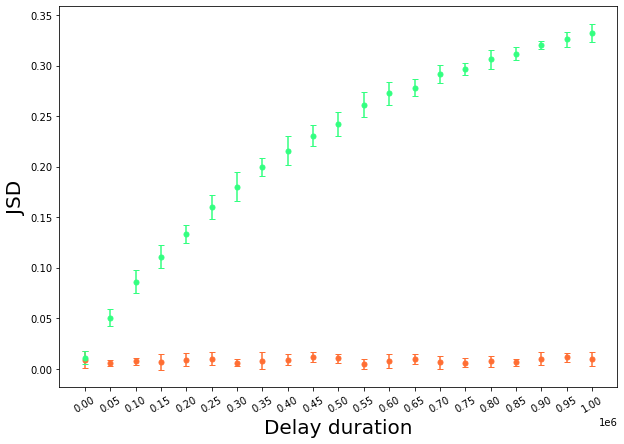

In [23]:
duration = e6["delay_duration"]
jsd_bef = e6["before_op"]["jsd_mean"]
sem_bef = e6["before_op"]["jsd_sem"]
jsd_aft = e6["after_op"]["jsd_mean"]
sem_aft = e6["after_op"]["jsd_sem"]

sigma = 3
# y軸方向にのみerrorbarを表示
plt.figure(figsize=(10,7))
plt.errorbar(delay_duration_e6, jsd_bef, yerr = [sigma*sem for sem in sem_bef], capsize=3, fmt='.', markersize=10, color='#FF6E33')
plt.errorbar(delay_duration_e6, jsd_aft, yerr = [sigma*sem for sem in sem_aft], capsize=3, fmt='.', markersize=10, color='#33FF80')
plt.xticks(duration, rotation=30)
plt.xlabel('Delay duration', fontsize=20)
plt.ylabel('JSD', fontsize=20)
plt.savefig("/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/experiments/plot/"+str(date.today())+"_"+backend_name+"_qibit0_e6.png")

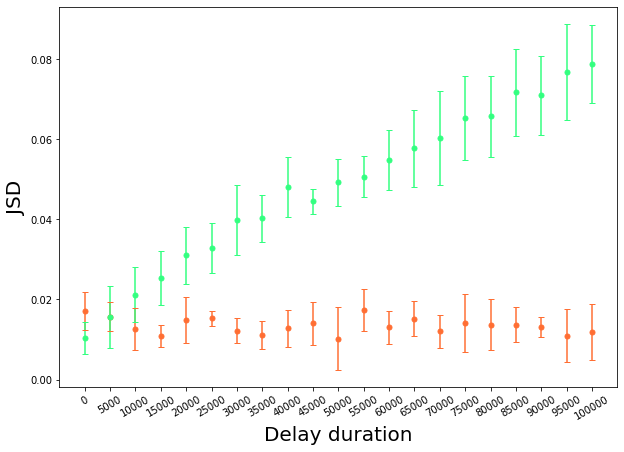

In [24]:
duration = e5["delay_duration"]
jsd_bef = e5["before_op"]["jsd_mean"]
sem_bef = e5["before_op"]["jsd_sem"]
jsd_aft = e5["after_op"]["jsd_mean"]
sem_aft = e5["after_op"]["jsd_sem"]

sigma = 3
# y軸方向にのみerrorbarを表示
plt.figure(figsize=(10,7))
plt.errorbar(delay_duration_e5, jsd_bef, yerr = [sigma*sem for sem in sem_bef], capsize=3, fmt='.', markersize=10, color='#FF6E33')
plt.errorbar(delay_duration_e5, jsd_aft, yerr = [sigma*sem for sem in sem_aft], capsize=3, fmt='.', markersize=10, color='#33FF80')
plt.xticks(duration, rotation=30)
plt.xlabel('Delay duration', fontsize=20)
plt.ylabel('JSD', fontsize=20)
plt.savefig("/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/experiments/plot/"+str(date.today())+"_"+backend_name+"_qibit0_e5.png")

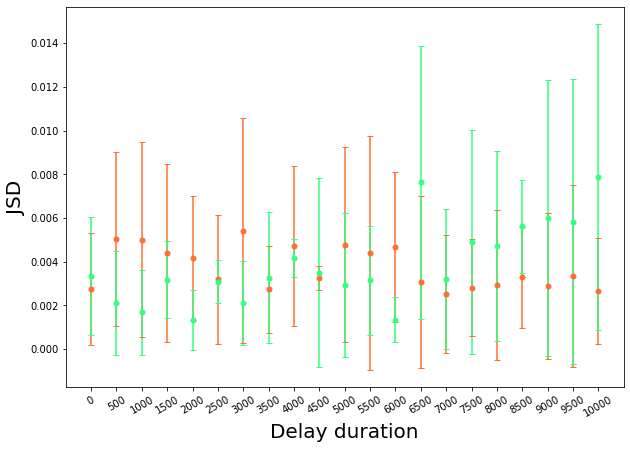

In [27]:
duration = e4["delay_duration"]
jsd_bef = e4["before_op"]["jsd_mean"]
sem_bef = e4["before_op"]["jsd_sem"]
jsd_aft = e4["after_op"]["jsd_mean"]
sem_aft = e4["after_op"]["jsd_sem"]

sigma = 3
# y軸方向にのみerrorbarを表示
plt.figure(figsize=(10,7))
plt.errorbar(delay_duration_e4, jsd_bef, yerr = [sigma*sem for sem in sem_bef], capsize=3, fmt='.', markersize=10, color='#FF6E33')
plt.errorbar(delay_duration_e4, jsd_aft, yerr = [sigma*sem for sem in sem_aft], capsize=3, fmt='.', markersize=10, color='#33FF80')
plt.xticks(duration, rotation=30)
plt.xlabel('Delay duration', fontsize=20)
plt.ylabel('JSD', fontsize=20)
plt.savefig("/Users/Yasuhiro/Documents/aqua/gp/experiments/waiting_duration/experiments/plot/"+str(date.today())+"_"+backend_name+"_qibit0_e4.png")